# CNN

In [ ]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import os

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## CIFAR Image

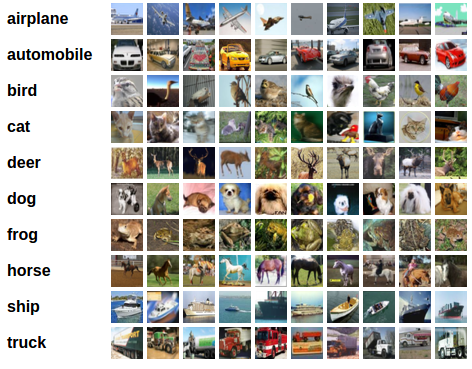

In [ ]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/ae5f66c58a905dd778a803bacdb1b19e2b2a2de4/image_day2/cifar10.png'
Image(image_url)

## CIFAR data import

#### OFFline pickle data

In [ ]:
# def unpickle(file):
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict
# data = unpickle(os.path.join(os.path.join(path, 'cifar-10-batches-py') ,'/data_batch_1'))

#### OFFline PIL data

In [ ]:
# OFFline PIL data
# trainset = torchvision.datasets.CIFAR10(root=path, train=True, 
#                                         download=False)

#### Online PIL image data

In [ ]:
# # For online situation
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

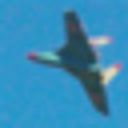

plane


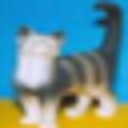

cat


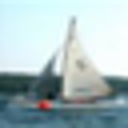

ship


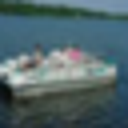

ship


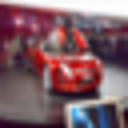

car


In [ ]:
for i in range(5):
    index = np.random.randint(len(trainset), dtype=int)
    image, label = trainset[index]
    image = image.resize((128, 128))
    display(image)
    print(classes[label])

### Transform PIL data to torch data and normalization

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)


In [ ]:
a, _ =trainset[0]
a

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

### Make Dataloader

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

## Define Model 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

New modules  

*   torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, ..., padding_mode='zeros', ...)
*   torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, ...)



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # Convolution layer
        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Tips for complicated convolution layer (same as above model)

In [ ]:
def conv_block(in_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size = 5), 
        nn.ReLU(), 
        nn.MaxPool2d(2, 2)
    )
    return model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.feature = nn.Sequential(
            conv_block(3, 6), 
            conv_block(6, 16)
        )
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
        
#         x = self.conv1(x)
#         x = self.pool(F.relu(self.conv2(x)))
        x = self.feature(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)


## Learning the model

In [ ]:
learning_rate = 0.001

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [ ]:
epochs = 20

In [ ]:
for epoch in range(epochs):
    running_cost = 0.0

    for step, (batch_data) in enumerate(trainloader):
        batch_x, batch_y = batch_data[0].to(device), batch_data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = net(batch_x)
        cost = criterion(outputs, batch_y)

        cost.backward()
        optimizer.step()
        
        running_cost += cost.item()
        if step % 2000 == 1999:
            print('[%d, %5d] cost: %.3f' % (epoch + 1, step + 1, running_cost / 2000))
            running_cost = 0.0
            

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] cost: 1.852
[1,  4000] cost: 1.612
[1,  6000] cost: 1.526
[1,  8000] cost: 1.456
[1, 10000] cost: 1.421
[1, 12000] cost: 1.374
[2,  2000] cost: 1.310
[2,  4000] cost: 1.304
[2,  6000] cost: 1.260
[2,  8000] cost: 1.252
[2, 10000] cost: 1.276
[2, 12000] cost: 1.237
[3,  2000] cost: 1.169
[3,  4000] cost: 1.180
[3,  6000] cost: 1.176
[3,  8000] cost: 1.171
[3, 10000] cost: 1.185
[3, 12000] cost: 1.176
[4,  2000] cost: 1.120
[4,  4000] cost: 1.104
[4,  6000] cost: 1.105
[4,  8000] cost: 1.127
[4, 10000] cost: 1.106
[4, 12000] cost: 1.102
[5,  2000] cost: 1.046
[5,  4000] cost: 1.041
[5,  6000] cost: 1.058
[5,  8000] cost: 1.082
[5, 10000] cost: 1.079
[5, 12000] cost: 1.080
[6,  2000] cost: 1.015
[6,  4000] cost: 1.013
[6,  6000] cost: 1.011
[6,  8000] cost: 1.034
[6, 10000] cost: 1.033
[6, 12000] cost: 1.053
[7,  2000] cost: 0.963
[7,  4000] cost: 0.968
[7,  6000] cost: 0.978
[7,  8000] cost: 1.006
[7, 10000] cost: 1.015
[7, 12000] cost: 0.993
[8,  2000] cost: 0.909
[8,  4000] 

## 정확도 판단

#### Test dataset import

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset),
                                          shuffle=False, num_workers=2)

Files already downloaded and verified


### Confusion matrix and scores

In [ ]:
test_iter = iter(testloader)
test_x, test_labels = test_iter.next()

In [ ]:
outputs = net(test_x.to(device))
_, predicted = torch.max(outputs, 1)

In [ ]:
predicted

tensor([3, 8, 1,  ..., 5, 1, 7], device='cuda:0')

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
predicted = predicted.cpu()
print(confusion_matrix(test_labels, predicted))

[[691  44  31  35  34  15   8  33  55  54]
 [ 25 762   1  18   6   9  16  20  11 132]
 [ 87   7 383 103 147  82  74  83  15  19]
 [ 29  12  44 427  77 217  62  93  10  29]
 [ 21   4  42  96 541  59  91 130   8   8]
 [ 21   7  37 182  56 545  16 123   1  12]
 [  5   9  27 113  74  39 680  27  10  16]
 [ 10   2  13  63  73  79   8 735   2  15]
 [146  87  19  33  24  12   7  10 590  72]
 [ 43 103   5  26   8  22  16  62  15 700]]


#### Precision

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(test_labels, predicted, average=None))
print(precision_score(test_labels, predicted, average='weighted'))

[0.64100186 0.73481196 0.63621262 0.38959854 0.52019231 0.50509731
 0.69529652 0.55851064 0.82287308 0.66225166]
0.6165846497338424


#### Recall

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(test_labels, predicted, average=None))
print(recall_score(test_labels, predicted, average='weighted'))

[0.691 0.762 0.383 0.427 0.541 0.545 0.68  0.735 0.59  0.7  ]
0.6054
